# Topic: Corporate finance risk prediction based on LightGBM

In [ ]:
# Table of content
1. Introduction
    1.1 Reason
    1.2 Finance risk
2. Data preprocessing
    2.1 Data source
    2.2 Handle missing value
    2.3 VIF feature
3. Model
    3.1 Decision tree
    3.2 K- nearest neighbor
    3.3 XGBClassifier
    3.4 LightGBM
4. Predict out of sample
    4.1 Data preprocessing
    4.2 Result of predict
5. Clustering process
    5.1 Feature classion
    5.2 Feature compression
    5.3 K-Means clustering
    5.4 Conclusion

1. Introduction

1.1 Reason for topic

The difficulty and high cost of financing has always been a significant challenge for both domestic and foreign enterprises. Improving financing efficiency and creating a better financing environment is a crucial issue that needs to be addressed.
LightGBM is an advanced machine learning algorithm that uses histogram-based techniques to enhance the accuracy of the model.
To compare the performance of LightGBM with other algorithms for enterprise financing risk prediction, 
the assignment conducted experiments using k-nearest-neighbors, decision tree, and random forest algorithms on the same dataset. 
The experiments indicate that LightGBM outperforms the other three algorithms in predicting several metrics for
corporate financing risk prediction. Therefore, it is believed that the LightGBM algorithm can be a useful tool in 
predicting the financing risk of enterprises.

1.2 Finance risk

This assignment uses the Altman Z-score to evaluate a company's financial risk,
particularly in the manufacturing sector. The Altman Z-score formula considers several financial ratios,
including profitability, leverage, liquidity, solvency, and activity, to determine whether a company is at risk of bankruptcy. 
The formula is as follows:

Altman Z-Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E

Where:
A = working capital / total assets
B = retained earnings / total assets
C = earnings before interest and tax / total assets
D = market value of equity / total liability
E = sales / total assets

After calculating the Altman Z-score, if the score is less than 2.99, the company is considered to have a high financial risk.
On the other hand, if the score is equal to or greater than 2.99, the company is considered to be in good operating condition 
and may be a viable target for financing. By using this formula, the paper aims to identify companies that are at
risk of bankruptcy and those that are financially stable, thereby helping investors and 
lenders make informed decisions about financing.

2. Data preprocessing

2.1 Data source

The assignment utilizes data from 591 companies in 9 different fields (excluding finance and banking) 
that are listed on HNX and HOSE in 2019. 
From this dataset, the financial ratio data of 100 companies with good operating conditions and 
400 companies with financing risk were selected as input data for the model, 
with the output data being whether or not there is financing risk. 
To validate the accuracy of the LightGBM algorithm's prediction of corporate financing risk in 2019, 
additional predictions were made using 2020 corporate data for a total of 91 companies
(40 companies with good operating conditions and 51 companies with financing risk).
This approach allowed the researchers to evaluate the effectiveness of the algorithm in predicting financing risk for 
companies in the year 2020.

The input features of the models in this study are various indicators of financial ratios. 
These ratios were chosen as input features because they are dimensionless data. 
This has two main benefits: firstly, it improves the training efficiency and accuracy of the model.
Secondly, since the scale and scope of operations of different companies vary greatly, 
using specific values such as annual revenue volume to reflect a company's operations may not be reasonable. 
Instead, using ratio data with dimensionless annual revenue growth rate can more objectively reflect a company's operations.

The financial ratio data used in this study includes four categories of indicators: 
cash flow indicators, profit indicators, financial indicators, and performance indicators.
Each of these categories contains different sub-categories of indicators. 
By using this comprehensive set of financial ratios, the study aims to capture a holistic view of a company's financial health and risk profile.

In [2]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
data = pd.read_excel('E:\\Study\\02.03\\ML\\Final Exam\\Data_fix\\test.xlsx')

In [4]:
data.head()

,No,ID,Name,Exchange,Categories,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
0,1,PTD,Công ty Cổ phần Thiết kế - Xây dựng - Thương m...,HNX,Công nghiệp,0.013101,0.079771,0.018300,0.008210,2.285326,...,1.163564,0.231190,5.032925,0.313831,-0.134740,-70.060446,-0.134999,0.181212,0.818788,Bad
1,3,PTS,Công ty Cổ phần Vận tải và Dịch vụ Petrolimex ...,HNX,Công nghiệp,-0.161252,0.128861,0.062529,0.020933,1.135059,...,1.630499,0.482286,3.380775,1.190563,4.355033,71.622330,4.636988,1.397075,-0.397075,Bad
2,5,PVB,Công ty Cổ phần Bọc ống Dầu khí Việt Nam,HNX,Dầu khí,0.707592,0.213600,0.131231,0.135510,0.446809,...,0.381732,0.198416,1.923903,0.455982,0.644381,62.359550,0.651109,5.900873,-4.900873,Bad
3,6,PVC,Tổng Công ty Hóa chất và Dịch vụ Dầu khí - Côn...,HNX,Dầu khí,-0.082468,0.096530,0.023725,0.019956,1.276242,...,0.522462,0.257300,2.030553,0.244259,-0.201430,NaN,-0.201430,1.190636,-0.190636,Bad
4,7,PVG,Công ty Cổ phần Kinh doanh LPG Việt Nam,HNX,Tiện ích Cộng đồng,-0.074964,0.106826,0.005491,0.000059,2.714316,...,0.246773,0.092550,2.666361,0.849025,0.078608,NaN,0.078608,-0.031253,1.031253,Bad


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   No                                                               500 non-null    int64  
 1   ID                                                               500 non-null    object 
 2   Name                                                             500 non-null    object 
 3   Exchange                                                         500 non-null    object 
 4   Categories                                                       500 non-null    object 
 5   Profit after tax – CFO /Revenue                                  500 non-null    float64
 6   Rates profit merge %                                             500 non-null    float64
 7   EBIT %                                      

2.2 Handle missing value

In [6]:
data.isna().sum()

No                                                                  0
ID                                                                  0
Name                                                                0
Exchange                                                            0
Categories                                                          0
Profit after tax – CFO /Revenue                                     0
Rates profit merge %                                                0
EBIT %                                                              0
Profit rate before tax %                                            0
Asset turnover ratio                                                0
Equity turnover ratio                                               0
EBIT                                                                0
Operating profit rate                                               0
ROE                                                                 0
ROCE                

The dataset contains 5 financial indicators with a significant number of missing values.
To address this issue, the random method was selected as it creates less distortion in the variance of data
while preserving the original distribution of the data. It should be noted that since there are 5 indicators with missing values, 
the random method needs to be applied 5 times. This approach ensures that the missing values are imputed in a manner that
accurately represents the original dataset and minimizes the impact of missing data on the analysis.
Other methods such as mean or median imputation may lead to biased results as they can significantly alter the distribution 
of the data. Therefore, the random method is a more appropriate solution for dealing with missing values in this dataset.

In [7]:
def random_sample_imputation(data):
   
    cols_with_missing_values = data.columns[data.isna().any()].tolist()

    for var in cols_with_missing_values:

    # extract a random sample
        random_sample_data = data[var].dropna().sample(data[var].isnull().sum(),
                                                  random_state=0)
    # re-index the randomly extracted sample
        random_sample_data.index = data[
            data[var].isnull()].index

    # replace the NA
        data.loc[data[var].isnull(), var] = random_sample_data
 
        return data

In [12]:
random_sample_imp_df = random_sample_imputation(data)
random_sample_imp_df

,No,ID,Name,Exchange,Categories,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
0,1,PTD,Công ty Cổ phần Thiết kế - Xây dựng - Thương m...,HNX,Công nghiệp,0.013101,0.079771,0.018300,0.008210,2.285326,...,1.163564,0.231190,5.032925,0.313831,-0.134740,-70.060446,-0.134999,0.181212,0.818788,Bad
1,3,PTS,Công ty Cổ phần Vận tải và Dịch vụ Petrolimex ...,HNX,Công nghiệp,-0.161252,0.128861,0.062529,0.020933,1.135059,...,1.630499,0.482286,3.380775,1.190563,4.355033,71.622330,4.636988,1.397075,-0.397075,Bad
2,5,PVB,Công ty Cổ phần Bọc ống Dầu khí Việt Nam,HNX,Dầu khí,0.707592,0.213600,0.131231,0.135510,0.446809,...,0.381732,0.198416,1.923903,0.455982,0.644381,62.359550,0.651109,5.900873,-4.900873,Bad
3,6,PVC,Tổng Công ty Hóa chất và Dịch vụ Dầu khí - Côn...,HNX,Dầu khí,-0.082468,0.096530,0.023725,0.019956,1.276242,...,0.522462,0.257300,2.030553,0.244259,-0.201430,5.257473,-0.201430,1.190636,-0.190636,Bad
4,7,PVG,Công ty Cổ phần Kinh doanh LPG Việt Nam,HNX,Tiện ích Cộng đồng,-0.074964,0.106826,0.005491,0.000059,2.714316,...,0.246773,0.092550,2.666361,0.849025,0.078608,0.706077,0.078608,-0.031253,1.031253,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,689,VCA,Công ty Cổ phần Thép VICASA - VNSTEEL,HOSE,Nguyên vật liệu,-0.044080,0.040418,0.020619,0.014344,4.363195,...,1.052345,0.468940,2.244094,0.377173,0.034272,0.317582,0.038418,1.819479,-0.819479,Good
496,691,VCF,Công ty Cổ phần Vinacafe Biên Hòa,HOSE,Hàng Tiêu dùng,0.007040,0.279092,0.260983,0.255507,1.391905,...,0.239521,0.155216,1.543148,3.312380,0.031432,0.053744,0.075713,1.182751,-0.182751,Good
497,698,VHC,Công ty Cổ phần Vĩnh Hoàn,HOSE,Hàng Tiêu dùng,-0.039419,0.194872,0.143949,0.166435,1.189754,...,0.177563,0.130970,1.355758,1.782130,-0.054716,-0.257241,-0.069499,0.151802,0.848198,Good
498,710,VNL,Công ty Cổ phần Logistics Vinalink,HOSE,Công nghiệp,-0.014230,0.031906,0.015728,0.025515,2.639809,...,0.000000,0.000000,1.612163,-0.177128,-0.050127,-0.071543,-0.167453,0.230441,0.769559,Good


In [13]:
data.isna().sum()

No                                                                 0
ID                                                                 0
Name                                                               0
Exchange                                                           0
Categories                                                         0
Profit after tax – CFO /Revenue                                    0
Rates profit merge %                                               0
EBIT %                                                             0
Profit rate before tax %                                           0
Asset turnover ratio                                               0
Equity turnover ratio                                              0
EBIT                                                               0
Operating profit rate                                              0
ROE                                                                0
ROCE                              

The target variable in this study is whether a company has financial risk or not.
To represent this in the model, a binary classification approach was used. 
Companies that have financial risk are assigned a value of 1, while companies without financial risk are assigned a value of 0.
This enables the model to accurately predict the financial risk profile of a company based on its financial ratios, 
allowing investors and lenders to make informed decisions.

In [14]:
data = data.replace({'Categories':{'Công nghiệp':'Industry',
                                     'Công nghệ Thông tin':'Information technology',
                                     'Dược phẩm và Y tế': 'Pharmaceutical and Medical',
                                     'Dầu khí':'Oil and Gas',
                                     'Dịch vụ Tiêu dùng':'Consumer Services',
                                     'Hàng Tiêu dùng':'Consumer goods',
                                      'Nguyên vật liệu':'Materials',
                                      'Tiện ích Cộng đồng':'Community Utilities',
                                       'Viễn thông':'Telecommunication'},
                     'Target':{'Good':0,
                                'Bad' :1}})
                     

In [15]:
data

,No,ID,Name,Exchange,Categories,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
0,1,PTD,Công ty Cổ phần Thiết kế - Xây dựng - Thương m...,HNX,Industry,0.013101,0.079771,0.018300,0.008210,2.285326,...,1.163564,0.231190,5.032925,0.313831,-0.134740,-70.060446,-0.134999,0.181212,0.818788,1
1,3,PTS,Công ty Cổ phần Vận tải và Dịch vụ Petrolimex ...,HNX,Industry,-0.161252,0.128861,0.062529,0.020933,1.135059,...,1.630499,0.482286,3.380775,1.190563,4.355033,71.622330,4.636988,1.397075,-0.397075,1
2,5,PVB,Công ty Cổ phần Bọc ống Dầu khí Việt Nam,HNX,Oil and Gas,0.707592,0.213600,0.131231,0.135510,0.446809,...,0.381732,0.198416,1.923903,0.455982,0.644381,62.359550,0.651109,5.900873,-4.900873,1
3,6,PVC,Tổng Công ty Hóa chất và Dịch vụ Dầu khí - Côn...,HNX,Oil and Gas,-0.082468,0.096530,0.023725,0.019956,1.276242,...,0.522462,0.257300,2.030553,0.244259,-0.201430,5.257473,-0.201430,1.190636,-0.190636,1
4,7,PVG,Công ty Cổ phần Kinh doanh LPG Việt Nam,HNX,Community Utilities,-0.074964,0.106826,0.005491,0.000059,2.714316,...,0.246773,0.092550,2.666361,0.849025,0.078608,0.706077,0.078608,-0.031253,1.031253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,689,VCA,Công ty Cổ phần Thép VICASA - VNSTEEL,HOSE,Materials,-0.044080,0.040418,0.020619,0.014344,4.363195,...,1.052345,0.468940,2.244094,0.377173,0.034272,0.317582,0.038418,1.819479,-0.819479,0
496,691,VCF,Công ty Cổ phần Vinacafe Biên Hòa,HOSE,Consumer goods,0.007040,0.279092,0.260983,0.255507,1.391905,...,0.239521,0.155216,1.543148,3.312380,0.031432,0.053744,0.075713,1.182751,-0.182751,0
497,698,VHC,Công ty Cổ phần Vĩnh Hoàn,HOSE,Consumer goods,-0.039419,0.194872,0.143949,0.166435,1.189754,...,0.177563,0.130970,1.355758,1.782130,-0.054716,-0.257241,-0.069499,0.151802,0.848198,0
498,710,VNL,Công ty Cổ phần Logistics Vinalink,HOSE,Industry,-0.014230,0.031906,0.015728,0.025515,2.639809,...,0.000000,0.000000,1.612163,-0.177128,-0.050127,-0.071543,-0.167453,0.230441,0.769559,0


In [16]:
data.describe()

,No,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,Equity turnover ratio,EBIT,Operating profit rate,ROE,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,344.06000,-0.202723,0.183541,0.070659,0.095185,1.222111,1.857046,262.312371,0.087052,0.087836,...,0.751892,0.231838,2.559542,-33.431983,0.371789,24.951232,0.421217,-0.775080,1.775080,0.800000
std,185.38455,2.407749,0.147441,0.231675,0.392043,1.124159,14.083984,1099.163136,0.405500,0.098940,...,1.110303,0.186535,2.745499,640.424293,1.546816,504.000688,1.574096,37.101644,37.101644,0.400401
min,1.00000,-44.188530,-0.333320,-3.384909,-2.637789,0.002886,0.006927,-853.542068,-2.616143,-0.776928,...,0.000000,0.000000,1.002681,-14178.068051,-4.165108,-4498.518151,-4.165108,-784.394283,-134.490699,0.000000
25%,196.75000,-0.084124,0.088360,0.025526,0.019819,0.571860,0.259569,11.714939,0.016401,0.036391,...,0.087659,0.055555,1.456058,-0.032746,-0.001033,-0.011977,-0.001437,-0.374699,-0.053345,1.000000
50%,355.50000,-0.013577,0.139689,0.056070,0.048856,0.969425,0.524369,36.912646,0.048750,0.082324,...,0.444256,0.211337,1.966005,0.303962,0.108724,0.581666,0.151288,0.078405,0.921595,1.000000
75%,493.25000,0.038624,0.240737,0.108336,0.113729,1.524230,0.942079,136.213244,0.109205,0.133433,...,1.088157,0.383559,2.916046,1.104661,0.374402,5.123504,0.469315,1.053345,1.374699,1.000000
max,711.00000,3.189041,0.919474,0.704286,6.860757,9.466545,285.265455,13648.967799,7.059860,0.472113,...,15.899692,0.756367,52.919544,356.640658,22.318892,8467.820543,22.318892,135.490699,785.394283,1.000000


In [17]:
data['Target'].value_counts()

1    400
0    100
Name: Target, dtype: int64

C:\Users\ngoct\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


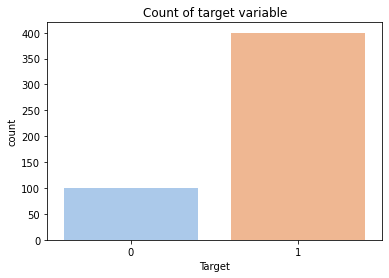

In [18]:
sns.countplot(data['Target'], palette = 'pastel')
plt.title('Count of target variable')
plt.show()

The data has 400 companies with bad financial and 100 companies with good financial. 

In [19]:
data.columns.values

array(['No', 'ID', 'Name', 'Exchange', 'Categories',
       'Profit after tax – CFO /Revenue', 'Rates profit merge %',
       'EBIT %', 'Profit rate before tax %', 'Asset turnover ratio',
       'Equity turnover ratio', 'EBIT', 'Operating profit rate', 'ROE',
       'ROCE', 'ROA', 'Average time to collect money  from customers',
       'Receivables turnover ratio', 'ROIC', 'Cash ratio', 'Quick  ratio',
       'Current ratio', 'Long-term loan / total assets',
       'Long-term short-term loans / Equity capital',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)',
       ' Net cash flow from operations/net debt',
       'Net cash flow from operating activities/non-current liabilities',
       'Ratio of net cash flow from operating activities',
       'Net cash flows from investing activities as a percentage',
       'Net cash flow from financing activities as a percentage',
       'Target'], dtype=object)

In [20]:
data1 = data.copy()

In [21]:
data1.drop(['ID','No','Name','Exchange','Categories','Name'],axis=1,inplace=True)

In [22]:
data1

,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,Equity turnover ratio,EBIT,Operating profit rate,ROE,ROCE,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
0,0.013101,0.079771,0.018300,0.008210,2.285326,0.086942,13.305795,0.008150,0.051333,0.179567,...,1.163564,0.231190,5.032925,0.313831,-0.134740,-70.060446,-0.134999,0.181212,0.818788,1
1,-0.161252,0.128861,0.062529,0.020933,1.135059,0.260595,21.639775,0.017684,0.057126,0.101606,...,1.630499,0.482286,3.380775,1.190563,4.355033,71.622330,4.636988,1.397075,-0.397075,1
2,0.707592,0.213600,0.131231,0.135510,0.446809,1.163308,50.211095,0.150323,0.083941,0.108558,...,0.381732,0.198416,1.923903,0.455982,0.644381,62.359550,0.651109,5.900873,-4.900873,1
3,-0.082468,0.096530,0.023725,0.019956,1.276242,0.385880,53.737958,0.023584,0.025066,0.060604,...,0.522462,0.257300,2.030553,0.244259,-0.201430,5.257473,-0.201430,1.190636,-0.190636,1
4,-0.074964,0.106826,0.005491,0.000059,2.714316,0.138172,19.111545,0.000415,0.000378,0.032620,...,0.246773,0.092550,2.666361,0.849025,0.078608,0.706077,0.078608,-0.031253,1.031253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.044080,0.040418,0.020619,0.014344,4.363195,0.102130,45.651413,0.014326,0.111860,0.201889,...,1.052345,0.468940,2.244094,0.377173,0.034272,0.317582,0.038418,1.819479,-0.819479,0
496,0.007040,0.279092,0.260983,0.255507,1.391905,0.465568,808.379933,0.257719,0.472113,0.558587,...,0.239521,0.155216,1.543148,3.312380,0.031432,0.053744,0.075713,1.182751,-0.182751,0
497,-0.039419,0.194872,0.143949,0.166435,1.189754,0.619956,1132.463628,0.166273,0.241758,0.231268,...,0.177563,0.130970,1.355758,1.782130,-0.054716,-0.257241,-0.069499,0.151802,0.848198,0
498,-0.014230,0.031906,0.015728,0.025515,2.639809,0.234973,14.153585,0.025049,0.059057,0.054698,...,0.000000,0.000000,1.612163,-0.177128,-0.050127,-0.071543,-0.167453,0.230441,0.769559,0


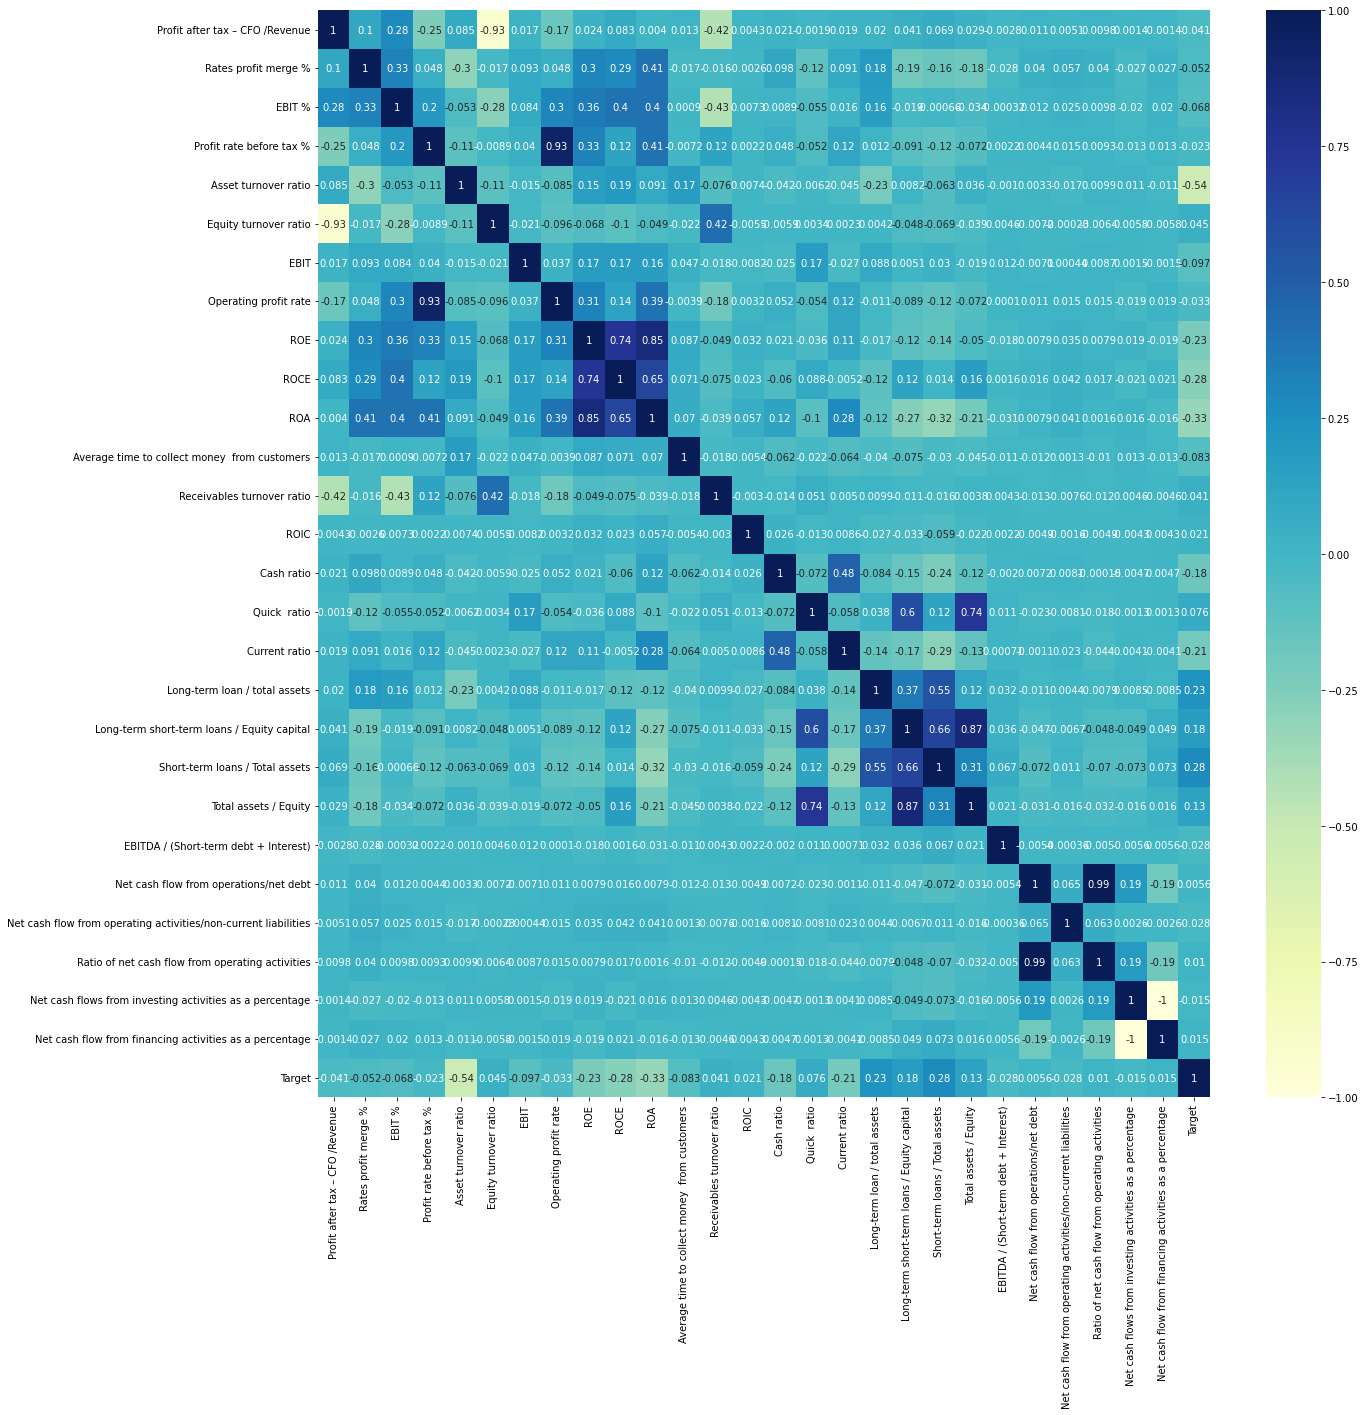

In [23]:
plt.figure(figsize = (20, 20))
sns.heatmap(data1.corr(), annot = True, cmap="YlGnBu")
plt.show()

2.3 VIF feature

The financial feature data used in this study contains a significant amount of covariance cases.
To minimize the impact of multicollinearity on the machine learning model, the VIF (variance inflation factor) 
feature selection method was used to identify features with high covariance and eliminate them.
Research suggests that when the VIF value of a feature exceeds 10, it is considered to have a significant covariance case, 
and conversely, features with VIF values less than 10 do not have significant covariance cases.
By applying the VIF method, a total of 18 features were retained, without any co-collinearity issues, as shown in the results. 
This feature selection process helps to improve the accuracy and effectiveness of the machine learning model by 
removing redundant features that can skew the results.

In [24]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state=42)

In [25]:
scaler = MinMaxScaler()

In [26]:
num_vars = ['Profit after tax – CFO /Revenue', 'Rates profit merge %', 'EBIT %',
       'Profit rate before tax %', 'Asset turnover ratio',
       'Equity turnover ratio', 'EBIT', 'Operating profit rate', 'ROE', 'ROCE',
       'ROA', 'Average time to collect money  from customers',
       'Receivables turnover ratio', 'ROIC', 'Cash ratio', 'Quick  ratio',
       'Current ratio', 'Long-term loan / total assets',
       'Long-term short-term loans / Equity capital',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)',' Net cash flow from operations/net debt',
       'Net cash flow from operating activities/non-current liabilities',
       'Ratio of net cash flow from operating activities',
       'Net cash flows from investing activities as a percentage',
       'Net cash flow from financing activities as a percentage']

In [27]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\ngoct\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [28]:
df_train.head()

,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,Equity turnover ratio,EBIT,Operating profit rate,ROE,ROCE,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
5,0.931548,0.323649,0.833228,0.286080,0.067183,0.002598,0.094224,0.277799,0.684834,0.543658,...,0.012471,0.068179,0.088007,0.975581,0.142744,0.347091,0.142910,0.623662,0.376338,1
116,0.488074,0.422324,0.347495,0.326845,0.000000,0.448514,0.065086,0.034941,0.622373,0.515017,...,0.064986,0.265905,0.146556,0.975464,0.140233,0.346941,0.141680,0.439032,0.560968,1
45,0.931864,0.402248,0.849373,0.284292,0.160678,0.000700,0.096733,0.276920,0.794727,0.739616,...,0.160176,0.625315,0.157753,0.975506,0.151962,0.347112,0.151962,0.461484,0.538516,1
16,0.934401,0.415422,0.836469,0.281550,0.069591,0.002511,0.065671,0.273847,0.651372,0.561691,...,0.023746,0.130174,0.087538,0.975419,0.143154,0.346952,0.148399,0.439943,0.560057,1
462,0.931529,0.325493,0.832368,0.279576,0.362934,0.000389,0.067037,0.272319,0.701377,0.632631,...,0.061778,0.335828,0.089002,0.975501,0.142900,0.346962,0.144495,0.438925,0.561075,0


In [29]:
y_train = df_train.pop('Target')
X_train = df_train

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,Net cash flow from financing activities as a p...,5620.45
25,Net cash flows from investing activities as a ...,3453.83
24,Ratio of net cash flow from operating activities,99.04
22,Net cash flow from operations/net debt,98.94
0,Profit after tax – CFO /Revenue,65.39
5,Equity turnover ratio,56.40
7,Operating profit rate,38.29
3,Profit rate before tax %,27.25
18,Long-term short-term loans / Equity capital,13.20
10,ROA,6.93


In [31]:
df = data1.copy()

In [32]:
df.drop([ 'Net cash flows from investing activities as a percentage',
       'Net cash flow from financing activities as a percentage',
         'Ratio of net cash flow from operating activities',
         ' Net cash flow from operations/net debt',
         'Profit after tax – CFO /Revenue',
         'Operating profit rate',
         'Equity turnover ratio',
         'Profit rate before tax %','Long-term short-term loans / Equity capital'
       ],axis=1,inplace=True)

In [33]:
df

,Rates profit merge %,EBIT %,Asset turnover ratio,EBIT,ROE,ROCE,ROA,Average time to collect money from customers,Receivables turnover ratio,ROIC,Cash ratio,Quick ratio,Current ratio,Long-term loan / total assets,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operating activities/non-current liabilities,Target
0,0.079771,0.018300,2.285326,13.305795,0.051333,0.179567,0.010199,6.540000,55.810400,0.180894,0.164721,1108.831410,1.017822,0.000000,0.231190,5.032925,0.313831,-70.060446,1
1,0.128861,0.062529,1.135059,21.639775,0.057126,0.101606,0.016897,26.873039,13.582386,0.147163,0.033142,698.939705,0.509979,0.349002,0.482286,3.380775,1.190563,71.622330,1
2,0.213600,0.131231,0.446809,50.211095,0.083941,0.108558,0.043631,0.941802,387.554769,0.295518,0.113748,4718.638404,2.001874,0.000000,0.198416,1.923903,0.455982,62.359550,1
3,0.096530,0.023725,1.276242,53.737958,0.025066,0.060604,0.012344,2.621244,139.246845,0.117680,0.293442,4060.512474,1.721558,0.000000,0.257300,2.030553,0.244259,5.257473,1
4,0.106826,0.005491,2.714316,19.111545,0.000378,0.032620,0.000142,8.601458,42.434667,0.161043,0.104205,5436.586308,0.869373,0.000000,0.092550,2.666361,0.849025,0.706077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.040418,0.020619,4.363195,45.651413,0.111860,0.201889,0.049846,19.368589,18.844946,0.191847,0.046419,2999.268013,1.430282,0.000000,0.468940,2.244094,0.377173,0.317582,0
496,0.279092,0.260983,1.391905,808.379933,0.472113,0.558587,0.305941,2.551198,143.070015,2.340372,0.280654,5137.355225,2.121740,0.000000,0.155216,1.543148,3.312380,0.053744,0
497,0.194872,0.143949,1.189754,1132.463628,0.241758,0.231268,0.178320,5.209134,70.069222,1.307657,0.050372,63479.489003,2.687800,0.000000,0.130970,1.355758,1.782130,-0.257241,0
498,0.031906,0.015728,2.639809,14.153585,0.059057,0.054698,0.036632,5.799113,62.940663,0.569823,0.901323,258.065952,2.831739,0.000000,0.000000,1.612163,-0.177128,-0.071543,0


3. Model

In [34]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [35]:
target= ['Target']
features = [ 'Rates profit merge %', 'EBIT %',
        'Asset turnover ratio',
        'EBIT',  'ROE', 'ROCE',
       'ROA', 'Average time to collect money  from customers',
       'Receivables turnover ratio', 'ROIC', 'Cash ratio', 'Quick  ratio',
       'Current ratio', 'Long-term loan / total assets',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)',
       'Net cash flow from operating activities/non-current liabilities']

In [36]:
#Creating the X and y variables
X = df[features].values
y = df[target].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

3.1  Decision tree

In [37]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_train, y_pred),3))

Confusion matrix:
    0    1
0  87    0
1   0  363 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       363

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Decision Tree accuracy:  1.0


In [38]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred= DT_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
   0   1
0  7   6
1  4  33 

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.85      0.89      0.87        37

    accuracy                           0.80        50
   macro avg       0.74      0.72      0.73        50
weighted avg       0.79      0.80      0.79        50

Decision Tree accuracy:  0.8


3.2  K- nearest neighbor

In [39]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train.ravel())

y_pred = KNN_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('KNN accuracy: ', round(accuracy_score(y_train, y_pred),4))

Confusion matrix:
    0    1
0  31   56
1  12  351 

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.36      0.48        87
           1       0.86      0.97      0.91       363

    accuracy                           0.85       450
   macro avg       0.79      0.66      0.69       450
weighted avg       0.84      0.85      0.83       450

KNN accuracy:  0.8489


In [40]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train.ravel())

y_pred = KNN_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('KNN accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
   0   1
0  2  11
1  4  33 

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.15      0.21        13
           1       0.75      0.89      0.81        37

    accuracy                           0.70        50
   macro avg       0.54      0.52      0.51        50
weighted avg       0.64      0.70      0.66        50

KNN accuracy:  0.7


3.3 XGBClassifier

In [41]:
# XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('XGB accuracy: ', round(accuracy_score(y_train, y_pred),4))

Confusion matrix:
    0    1
0  87    0
1   0  363 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       363

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

XGB accuracy:  1.0


In [42]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('XGB accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
   0   1
0  7   6
1  1  36 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.86      0.97      0.91        37

    accuracy                           0.86        50
   macro avg       0.87      0.76      0.79        50
weighted avg       0.86      0.86      0.85        50

XGB accuracy:  0.86


In [43]:
import lightgbm as lgb
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'n_jobs': -1,
    'random_state': 42
}

clf = lgb.LGBMClassifier(**params)

#  Train the model
clf.fit(X_train, y_train)

#  Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

C:\Users\ngoct\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [44]:
import pandas as pd

# create a dictionary of the results
results = {'Algorithm': ['Decision Tree', 'KNN', 'XGB', 'Lightgbm'],
           'Accuracy': [0.8, 0.7, 0.86, 0.88],
           'Precision': [0.85, 0.75, 0.86, 0.8974],
           'Recall': [0.89, 0.89, 0.97, 0.9459],
           'F1 Score': [0.87, 0.81, 0.91, 0.9211]}

# create a dataframe from the dictionary
result = pd.DataFrame(results)

# set the index to the algorithm names
result.set_index('Algorithm', inplace=True)

# print the dataframe
print(result)

               Accuracy  Precision  Recall  F1 Score
Algorithm                                           
Decision Tree      0.80     0.8500  0.8900    0.8700
KNN                0.70     0.7500  0.8900    0.8100
XGB                0.86     0.8600  0.9700    0.9100
Lightgbm           0.88     0.8974  0.9459    0.9211


Based on the results, the LightGBM algorithm appears to be the best performing algorithm,
achieving the highest accuracy, precision, recall, and F1 score.
Additionally, LightGBM is known for its efficiency and scalability, making it a good choice for large and complex datasets.

4. Predict out of sample

In [45]:
import lightgbm as lgb
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_excel('E:\\Study\\02.03\\ML\\Final Exam\\Data_fix\\test.xlsx')

# Define the LightGBM model and its hyperparameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model on the entire dataset
model = lgb.train(params, lgb.Dataset(df.drop('Target', axis=1), label=df['Target']))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

4.1 Data preprocessing

In [46]:
# Load the out-of-sample data into a pandas DataFrame
oos_data = pd.read_excel('E:\\Study\\02.03\\ML\\Final Exam\\Data_fix\\prediction.xlsx')
df_o = oos_data.copy()
df_o.drop(['ID','No','Name','Exchange','Categories','Name','Target',
           'Net cash flows from investing activities as a percentage',
       'Net cash flow from financing activities as a percentage',
         'Ratio of net cash flow from operating activities',
         ' Net cash flow from operations/net debt',
         'Profit after tax – CFO /Revenue',
         'Operating profit rate',
         'Equity turnover ratio',
         'Profit rate before tax %','Long-term short-term loans / Equity capital'],axis=1,inplace=True)


In [47]:
df_o 

,Rates profit merge %,EBIT %,Asset turnover ratio,EBIT,ROE,ROCE,ROA,Average time to collect money from customers,Receivables turnover ratio,ROIC,Cash ratio,Quick ratio,Current ratio,Long-term loan / total assets,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operating activities/non-current liabilities
0,0.166747,0.066922,0.878949,113.834072,0.134103,0.150620,0.038298,133.868406,2.726558,0.360989,0.030589,17231.576741,0.619924,0.040909,0.162944,3.501532,0.696858,NaN
1,0.162438,0.099280,0.893591,94.470732,0.093223,0.111108,0.067940,4.913821,74.280273,2.153901,0.679214,725.938238,2.335117,0.031761,0.041188,1.372131,20.051365,-0.139803
2,0.158805,0.080164,1.246816,292.132715,0.151359,0.183564,0.073808,14.081901,25.919795,0.292020,0.169101,4327.300276,1.220156,0.042197,0.342269,2.050707,0.596438,3.069124
3,0.221176,0.107475,0.753274,17.313774,0.040161,0.087001,0.036710,4.608944,79.193837,NaN,1.440993,73.913520,7.467909,0.000000,0.000000,1.094016,-0.379257,0.029802
4,0.172020,-0.010839,1.085444,-11.936567,0.017189,-0.023273,0.008018,10.178298,35.860614,-0.031146,0.194584,1348.643448,1.384995,0.037760,0.377742,2.143857,0.308426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.354514,0.298427,0.501385,104.507457,0.130644,0.164453,0.118157,5.333116,68.440287,5.748681,0.848198,310.712535,4.190024,0.001986,0.026028,1.105675,243.205063,0.000273
87,0.038001,0.001496,6.447576,7.073848,0.087340,0.038541,0.021673,31.172517,11.709032,0.023216,0.104965,2163.992982,1.111469,0.001500,0.415453,4.029943,0.075919,NaN
88,0.088830,0.042910,2.540276,91.414693,0.143589,0.163058,0.092944,8.446380,43.213778,NaN,1.357408,469.116968,2.374030,0.000000,0.000000,1.544886,NaN,-0.242416
89,0.049102,0.014746,8.157407,61.986129,0.018454,0.134709,0.015925,90.861132,4.017119,4.427581,0.521108,155.481257,3.735655,0.000000,0.027168,1.158853,9.062808,1.731729


In [48]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Rates profit merge %                                             91 non-null     float64
 1   EBIT %                                                           91 non-null     float64
 2   Asset turnover ratio                                             91 non-null     float64
 3   EBIT                                                             91 non-null     float64
 4   ROE                                                              91 non-null     float64
 5   ROCE                                                             91 non-null     float64
 6   ROA                                                              91 non-null     float64
 7   Average time to collect money  from customers 

In [49]:
def random_sample_imputation(df_o):
   
    cols_with_missing_values = df_o.columns[df_o.isna().any()].tolist()

    for var in cols_with_missing_values:

    # extract a random sample
        random_sample_data = df_o[var].dropna().sample(df_o[var].isnull().sum(),
                                                  random_state=0)
    # re-index the randomly extracted sample
        random_sample_data.index = df_o[
            df_o[var].isnull()].index

    # replace the NA
        df_o.loc[df_o[var].isnull(), var] = random_sample_data
 
        return df_o

In [54]:
random_sample_imp_df = random_sample_imputation(df_o)
random_sample_imp_df

In [55]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Rates profit merge %                                             91 non-null     float64
 1   EBIT %                                                           91 non-null     float64
 2   Asset turnover ratio                                             91 non-null     float64
 3   EBIT                                                             91 non-null     float64
 4   ROE                                                              91 non-null     float64
 5   ROCE                                                             91 non-null     float64
 6   ROA                                                              91 non-null     float64
 7   Average time to collect money  from customers 

4.2 Result of predict

In [56]:
# Preprocess the out-of-sample data to match the format of the training data


# Use the trained model to make predictions on the out-of-sample data
oos_pred = model.predict(df_o)

# Interpret the prediction results as needed
# This might include converting predicted probabilities to binary values, ranking predictions, assigning confidence scores, etc.

In [57]:
oos_pred

array([0.99685805, 0.99419802, 0.9932163 , 0.9460485 , 0.99383283,
       0.98780062, 0.99406631, 0.998377  , 0.88338341, 0.96405244,
       0.99470705, 0.99832179, 0.60297441, 0.97293726, 0.99849184,
       0.997014  , 0.7975744 , 0.99464876, 0.99121863, 0.86328686,
       0.99341425, 0.97552513, 0.9693251 , 0.95376059, 0.99692344,
       0.99830663, 0.99720375, 0.96156848, 0.83843812, 0.99590658,
       0.99827599, 0.99825137, 0.99491316, 0.99770004, 0.99450432,
       0.99595846, 0.9769061 , 0.98163878, 0.84738338, 0.99666463,
       0.99825221, 0.99657426, 0.99806176, 0.99785118, 0.99814306,
       0.98615906, 0.78811337, 0.99709565, 0.99855335, 0.99346366,
       0.99767763, 0.23761226, 0.23149175, 0.00712742, 0.28175387,
       0.10331059, 0.12966021, 0.76119892, 0.02094609, 0.02075788,
       0.14426244, 0.87638021, 0.48860981, 0.03330053, 0.01245566,
       0.94677024, 0.02050598, 0.01336548, 0.01320961, 0.720422  ,
       0.64146305, 0.98818104, 0.38189   , 0.9203033 , 0.17430

In [59]:

y_pred_binary = (oos_pred >= 0.8).astype(int) # Convert to binary class labels using a threshold of 0.5
print(y_pred_binary)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [60]:
df_pre = pd.DataFrame(y_pred_binary)

In [61]:
df_pre

,0
0,1
1,1
2,1
3,1
4,1
...,...
86,1
87,0
88,0
89,0


In [62]:
oos_data

,No,ID,Name,Exchange,Categories,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
0,643,TCD,Công ty Cổ phần Đầu tư Phát triển Công nghiệp ...,HOSE,Công nghiệp,-0.122186,0.166747,0.066922,0.071399,0.878949,...,0.570552,0.162944,3.501532,0.696858,0.220758,NaN,0.220758,-1.064237,2.064237,Bad
1,644,TCL,Công ty Cổ phần Đại lý Giao nhận Vận tải Xếp d...,HOSE,Công nghiệp,-0.099561,0.162438,0.099280,0.127794,0.893591,...,0.056516,0.041188,1.372131,20.051365,-0.087763,-0.139803,-0.235772,64.441723,-63.441723,Bad
2,645,TCM,Công ty Cổ phần Dệt may - Đầu tư - Thương mại ...,HOSE,Hàng Tiêu dùng,-0.085389,0.158805,0.080164,0.075197,1.246816,...,0.701894,0.342269,2.050707,0.596438,0.181113,3.069124,0.192471,-0.080347,1.080347,Bad
3,646,TCO,Công ty Cổ phần Vận tải Đa phương thức Duyên Hải,HOSE,Công nghiệp,-0.122162,0.221176,0.107475,0.128677,0.753274,...,0.000000,0.000000,1.094016,-0.379257,0.007939,0.029802,0.010822,1.345615,-0.345615,Bad
4,647,TCR,Công ty Cổ phần Công nghiệp Gốm sứ TAICERA,HOSE,Công nghiệp,-0.135376,0.172020,-0.010839,0.007414,1.085444,...,0.809824,0.377742,2.143857,0.308426,-0.493398,NaN,-0.493398,-0.024491,1.024491,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,183,CLL,Công ty Cổ phần Cảng Cát Lái,HOSE,Công nghiệp,-0.070886,0.354514,0.298427,0.322489,0.501385,...,0.028779,0.026028,1.105675,243.205063,0.000113,0.000273,0.000194,1.000759,-0.000759,Good
87,185,CMV,Công ty Cổ phần Thương nghiệp Cà Mau,HOSE,Dịch vụ Tiêu dùng,0.012806,0.038001,0.001496,0.005546,6.447576,...,1.674250,0.415453,4.029943,0.075919,0.637762,NaN,0.637762,112.664603,-111.664603,Good
88,187,CNG,Công ty Cổ phần CNG Việt Nam,HOSE,Tiện ích Cộng đồng,-0.009539,0.088830,0.042910,0.050512,2.540276,...,0.000000,0.000000,1.544886,NaN,-0.059607,-0.242416,-0.079042,0.814288,0.185712,Good
89,188,COM,Công ty Cổ phần Vật tư Xăng dầu,HOSE,Dịch vụ Tiêu dùng,0.013434,0.049102,0.014746,0.015131,8.157407,...,0.031484,0.027168,1.158853,9.062808,0.494075,1.731729,0.691311,6.473328,-5.473328,Good


In [63]:
oos_data1 = oos_data.copy()

In [64]:
oos_data1

,No,ID,Name,Exchange,Categories,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,...,Long-term short-term loans / Equity capital,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target
0,643,TCD,Công ty Cổ phần Đầu tư Phát triển Công nghiệp ...,HOSE,Công nghiệp,-0.122186,0.166747,0.066922,0.071399,0.878949,...,0.570552,0.162944,3.501532,0.696858,0.220758,NaN,0.220758,-1.064237,2.064237,Bad
1,644,TCL,Công ty Cổ phần Đại lý Giao nhận Vận tải Xếp d...,HOSE,Công nghiệp,-0.099561,0.162438,0.099280,0.127794,0.893591,...,0.056516,0.041188,1.372131,20.051365,-0.087763,-0.139803,-0.235772,64.441723,-63.441723,Bad
2,645,TCM,Công ty Cổ phần Dệt may - Đầu tư - Thương mại ...,HOSE,Hàng Tiêu dùng,-0.085389,0.158805,0.080164,0.075197,1.246816,...,0.701894,0.342269,2.050707,0.596438,0.181113,3.069124,0.192471,-0.080347,1.080347,Bad
3,646,TCO,Công ty Cổ phần Vận tải Đa phương thức Duyên Hải,HOSE,Công nghiệp,-0.122162,0.221176,0.107475,0.128677,0.753274,...,0.000000,0.000000,1.094016,-0.379257,0.007939,0.029802,0.010822,1.345615,-0.345615,Bad
4,647,TCR,Công ty Cổ phần Công nghiệp Gốm sứ TAICERA,HOSE,Công nghiệp,-0.135376,0.172020,-0.010839,0.007414,1.085444,...,0.809824,0.377742,2.143857,0.308426,-0.493398,NaN,-0.493398,-0.024491,1.024491,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,183,CLL,Công ty Cổ phần Cảng Cát Lái,HOSE,Công nghiệp,-0.070886,0.354514,0.298427,0.322489,0.501385,...,0.028779,0.026028,1.105675,243.205063,0.000113,0.000273,0.000194,1.000759,-0.000759,Good
87,185,CMV,Công ty Cổ phần Thương nghiệp Cà Mau,HOSE,Dịch vụ Tiêu dùng,0.012806,0.038001,0.001496,0.005546,6.447576,...,1.674250,0.415453,4.029943,0.075919,0.637762,NaN,0.637762,112.664603,-111.664603,Good
88,187,CNG,Công ty Cổ phần CNG Việt Nam,HOSE,Tiện ích Cộng đồng,-0.009539,0.088830,0.042910,0.050512,2.540276,...,0.000000,0.000000,1.544886,NaN,-0.059607,-0.242416,-0.079042,0.814288,0.185712,Good
89,188,COM,Công ty Cổ phần Vật tư Xăng dầu,HOSE,Dịch vụ Tiêu dùng,0.013434,0.049102,0.014746,0.015131,8.157407,...,0.031484,0.027168,1.158853,9.062808,0.494075,1.731729,0.691311,6.473328,-5.473328,Good


In [65]:
oos_data1 = oos_data1.assign(C=df_pre)

In [66]:
oos_data1

,No,ID,Name,Exchange,Categories,Profit after tax – CFO /Revenue,Rates profit merge %,EBIT %,Profit rate before tax %,Asset turnover ratio,...,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),Net cash flow from operations/net debt,Net cash flow from operating activities/non-current liabilities,Ratio of net cash flow from operating activities,Net cash flows from investing activities as a percentage,Net cash flow from financing activities as a percentage,Target,C
0,643,TCD,Công ty Cổ phần Đầu tư Phát triển Công nghiệp ...,HOSE,Công nghiệp,-0.122186,0.166747,0.066922,0.071399,0.878949,...,0.162944,3.501532,0.696858,0.220758,NaN,0.220758,-1.064237,2.064237,Bad,1
1,644,TCL,Công ty Cổ phần Đại lý Giao nhận Vận tải Xếp d...,HOSE,Công nghiệp,-0.099561,0.162438,0.099280,0.127794,0.893591,...,0.041188,1.372131,20.051365,-0.087763,-0.139803,-0.235772,64.441723,-63.441723,Bad,1
2,645,TCM,Công ty Cổ phần Dệt may - Đầu tư - Thương mại ...,HOSE,Hàng Tiêu dùng,-0.085389,0.158805,0.080164,0.075197,1.246816,...,0.342269,2.050707,0.596438,0.181113,3.069124,0.192471,-0.080347,1.080347,Bad,1
3,646,TCO,Công ty Cổ phần Vận tải Đa phương thức Duyên Hải,HOSE,Công nghiệp,-0.122162,0.221176,0.107475,0.128677,0.753274,...,0.000000,1.094016,-0.379257,0.007939,0.029802,0.010822,1.345615,-0.345615,Bad,1
4,647,TCR,Công ty Cổ phần Công nghiệp Gốm sứ TAICERA,HOSE,Công nghiệp,-0.135376,0.172020,-0.010839,0.007414,1.085444,...,0.377742,2.143857,0.308426,-0.493398,NaN,-0.493398,-0.024491,1.024491,Bad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,183,CLL,Công ty Cổ phần Cảng Cát Lái,HOSE,Công nghiệp,-0.070886,0.354514,0.298427,0.322489,0.501385,...,0.026028,1.105675,243.205063,0.000113,0.000273,0.000194,1.000759,-0.000759,Good,1
87,185,CMV,Công ty Cổ phần Thương nghiệp Cà Mau,HOSE,Dịch vụ Tiêu dùng,0.012806,0.038001,0.001496,0.005546,6.447576,...,0.415453,4.029943,0.075919,0.637762,NaN,0.637762,112.664603,-111.664603,Good,0
88,187,CNG,Công ty Cổ phần CNG Việt Nam,HOSE,Tiện ích Cộng đồng,-0.009539,0.088830,0.042910,0.050512,2.540276,...,0.000000,1.544886,NaN,-0.059607,-0.242416,-0.079042,0.814288,0.185712,Good,0
89,188,COM,Công ty Cổ phần Vật tư Xăng dầu,HOSE,Dịch vụ Tiêu dùng,0.013434,0.049102,0.014746,0.015131,8.157407,...,0.027168,1.158853,9.062808,0.494075,1.731729,0.691311,6.473328,-5.473328,Good,0


In [67]:
oos_data1.columns

Index(['No', 'ID', 'Name', 'Exchange', 'Categories',
       'Profit after tax – CFO /Revenue', 'Rates profit merge %', 'EBIT %',
       'Profit rate before tax %', 'Asset turnover ratio',
       'Equity turnover ratio', 'EBIT', 'Operating profit rate', 'ROE', 'ROCE',
       'ROA', 'Average time to collect money  from customers',
       'Receivables turnover ratio', 'ROIC', 'Cash ratio', 'Quick  ratio',
       'Current ratio', 'Long-term loan / total assets',
       'Long-term short-term loans / Equity capital',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)',
       ' Net cash flow from operations/net debt',
       'Net cash flow from operating activities/non-current liabilities',
       'Ratio of net cash flow from operating activities',
       'Net cash flows from investing activities as a percentage',
       'Net cash flow from financing activities as a percentage', 'Target',
       'C'],
      dtype='object')

In [68]:
oos_data1.drop(['Profit after tax – CFO /Revenue', 'Rates profit merge %', 'EBIT %',
       'Profit rate before tax %', 'Asset turnover ratio',
       'Equity turnover ratio', 'EBIT', 'Operating profit rate', 'ROE', 'ROCE',
       'ROA', 'Average time to collect money  from customers',
       'Receivables turnover ratio', 'ROIC', 'Cash ratio', 'Quick  ratio',
       'Current ratio', 'Long-term loan / total assets',
       'Long-term short-term loans / Equity capital',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)',
       ' Net cash flow from operations/net debt',
       'Net cash flow from operating activities/non-current liabilities',
       'Ratio of net cash flow from operating activities',
       'Net cash flows from investing activities as a percentage',
       'Net cash flow from financing activities as a percentage'], axis=1, inplace=True)

In [69]:
oos_data1 = oos_data1.replace({'Categories':{'Công nghiệp':'Industry',
                                     'Công nghệ Thông tin':'Information technology',
                                     'Dược phẩm và Y tế': 'Pharmaceutical and Medical',
                                     'Dầu khí':'Oil and Gas',
                                     'Dịch vụ Tiêu dùng':'Consumer Services',
                                     'Hàng Tiêu dùng':'Consumer goods',
                                      'Nguyên vật liệu':'Materials',
                                      'Tiện ích Cộng đồng':'Community Utilities',
                                       'Viễn thông':'Telecommunication'},
                     'Target':{'Good':0,
                                'Bad' :1}})
                     

In [70]:
oos_data1

,No,ID,Name,Exchange,Categories,Target,C
0,643,TCD,Công ty Cổ phần Đầu tư Phát triển Công nghiệp ...,HOSE,Industry,1,1
1,644,TCL,Công ty Cổ phần Đại lý Giao nhận Vận tải Xếp d...,HOSE,Industry,1,1
2,645,TCM,Công ty Cổ phần Dệt may - Đầu tư - Thương mại ...,HOSE,Consumer goods,1,1
3,646,TCO,Công ty Cổ phần Vận tải Đa phương thức Duyên Hải,HOSE,Industry,1,1
4,647,TCR,Công ty Cổ phần Công nghiệp Gốm sứ TAICERA,HOSE,Industry,1,1
...,...,...,...,...,...,...,...
86,183,CLL,Công ty Cổ phần Cảng Cát Lái,HOSE,Industry,0,1
87,185,CMV,Công ty Cổ phần Thương nghiệp Cà Mau,HOSE,Consumer Services,0,0
88,187,CNG,Công ty Cổ phần CNG Việt Nam,HOSE,Community Utilities,0,0
89,188,COM,Công ty Cổ phần Vật tư Xăng dầu,HOSE,Consumer Services,0,0


In [71]:
oos_data1['Target'].value_counts()

1    51
0    40
Name: Target, dtype: int64

In [72]:
oos_data1['C'].value_counts()

1    56
0    35
Name: C, dtype: int64

It can be seen that the model's predictions were not very accurate. The model predicted 35 instances as "good" and 56 instances as "bad", but the actual targets were 51 instances of "bad" and 40 instances of "good". This means that the model had a relatively high number of false positives (predicting "good" when the actual target was "bad") and a relatively low number of false negatives (predicting "bad" when the actual target was "good").

5. Clustering process


5.1 Feature classion


 All the features are classified into 4 major categories (profit index, performance index, financial health index, cash flow index) according to their attributes, 

5.2 Feature compression


The features in each category of indices are weighted by an averaging operation to get the
final, weighted by the importance (see Table 1) of the features obtained in the LightGBM algorithm. The feature of each
class is represented by the result of the weighted average, to achieve the effect of compressing the feature.

In [78]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state=42)

In [79]:
scaler = MinMaxScaler()

In [80]:
features

['Rates profit merge %',
 'EBIT %',
 'Asset turnover ratio',
 'EBIT',
 'ROE',
 'ROCE',
 'ROA',
 'Average time to collect money  from customers',
 'Receivables turnover ratio',
 'ROIC',
 'Cash ratio',
 'Quick  ratio',
 'Current ratio',
 'Long-term loan / total assets',
 'Short-term loans / Total assets',
 'Total assets / Equity',
 'EBITDA / (Short-term debt + Interest)',
 'Net cash flow from operating activities/non-current liabilities']

In [81]:
data_train[features] = scaler.fit_transform(data_train[features])

C:\Users\ngoct\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [82]:
y_train = data_train.pop('Target')
X_train = data_train

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

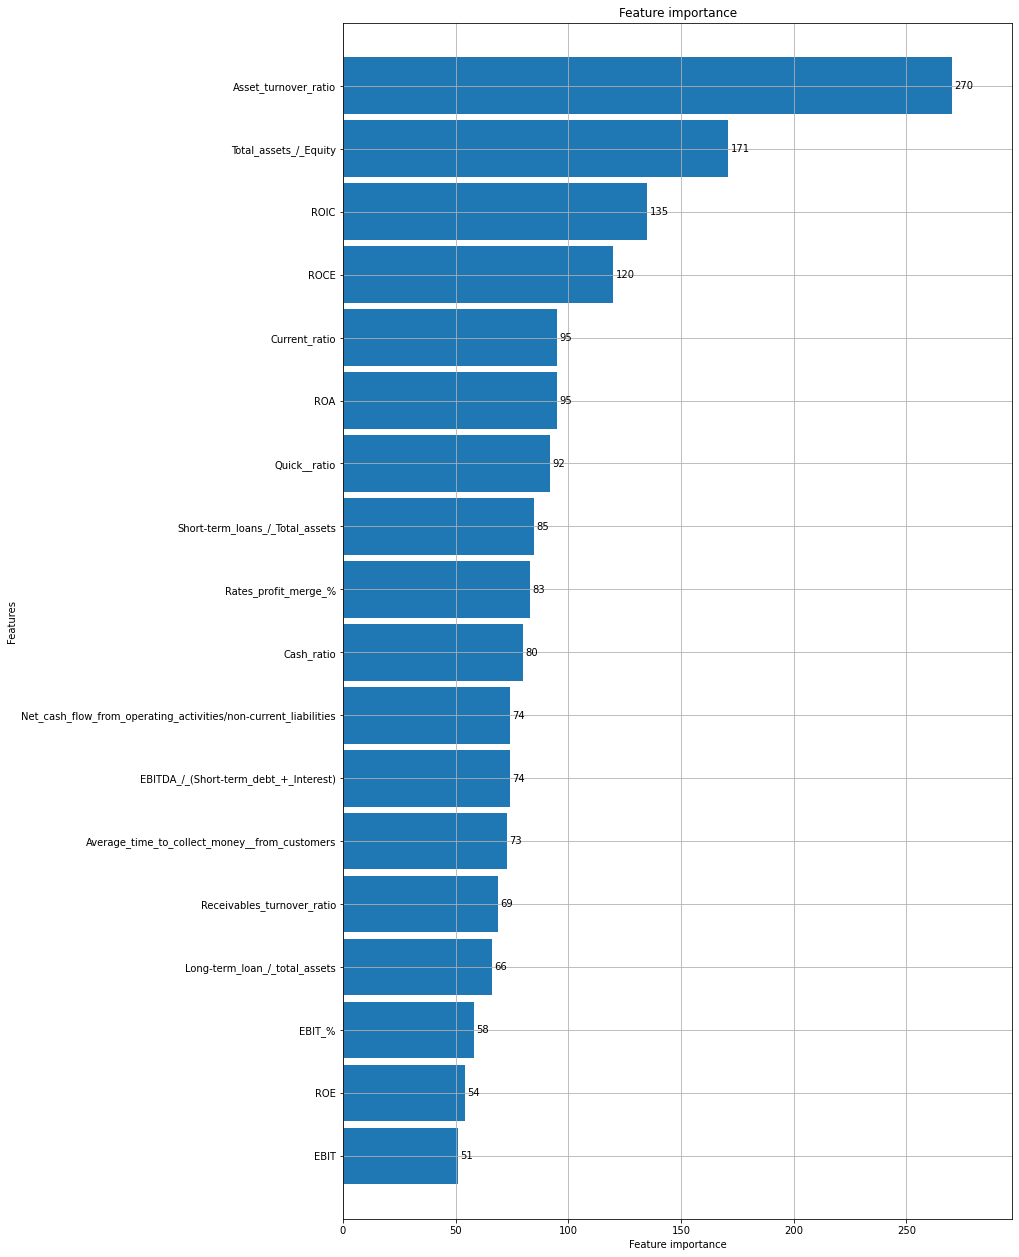

In [83]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12, 22)
lightgbm.plot_importance(lgbm_model, max_num_features = 60, height=.9)

In [88]:
score ={'features':['Rates profit merge %', 'EBIT %', 'Asset turnover ratio','EBIT', 
                    'ROE','ROCE', 'ROA', 'Average time to collect money  from customers',
                           'Receivables turnover ratio', 'ROIC'
                   , 'Cash ratio', 'Quick  ratio',
                           'Current ratio', 'Long-term loan / total assets',
                           'Short-term loans / Total assets', 'Total assets / Equity',
                           'EBITDA / (Short-term debt + Interest)',
       'Net cash flow from operating activities/non-current liabilities'],
       'score':[83,  58, 270  ,51, 
               54, 120,  95,  73,  69, 135,
               80,  92,  95, 66,  85, 171,  74,  74
               ],
       'category':['profit_index','profit_index','profit_index','profit_index',
                    'performance_index', 'performance_index', 'performance_index', 'performance_index',
                        'performance_index', 'performance_index',
                   'financial_health_index','financial_health_index','financial_health_index',
                       'financial_health_index','financial_health_index','financial_health_index','financial_health_index',
                   'cash_flow_index']}

      
importance = pd.DataFrame(score,index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

In [89]:
importance 

,features,score,category
0,Rates profit merge %,83,profit_index
1,EBIT %,58,profit_index
2,Asset turnover ratio,270,profit_index
3,EBIT,51,profit_index
4,ROE,54,performance_index
5,ROCE,120,performance_index
6,ROA,95,performance_index
7,Average time to collect money from customers,73,performance_index
8,Receivables turnover ratio,69,performance_index
9,ROIC,135,performance_index


In [90]:
df_profit = data[['No','ID','Rates profit merge %','EBIT %','Asset turnover ratio','EBIT']]

In [91]:
df_performance =data[['No','ID','ROE','ROCE','ROA','Average time to collect money  from customers'
                      ,'Receivables turnover ratio','ROIC']]

In [97]:
df_financial_health = data[['No','ID','Cash ratio', 'Quick  ratio',
       'Current ratio', 'Long-term loan / total assets',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)']]

In [92]:
df_profit['profit_index']=(df_profit['Rates profit merge %']*83+df_profit['EBIT %']*58
                    +df_profit['Asset turnover ratio']*270+df_profit['EBIT']*51)/df_profit.sum(axis=1)

C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\706547047.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  +df_profit['Asset turnover ratio']*270+df_profit['EBIT']*51)/df_profit.sum(axis=1)
C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\706547047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profit['profit_index']=(df_profit['Rates profit merge %']*83+df_profit['EBIT %']*58


In [93]:
df_profit

,No,ID,Rates profit merge %,EBIT %,Asset turnover ratio,EBIT,profit_index
0,1,PTD,0.079771,0.018300,2.285326,13.305795,78.093414
1,3,PTS,0.128861,0.062529,1.135059,21.639775,54.856514
2,5,PVB,0.213600,0.131231,0.446809,50.211095,48.332363
3,6,PVC,0.096530,0.023725,1.276242,53.737958,50.619724
4,7,PVG,0.106826,0.005491,2.714316,19.111545,59.324370
...,...,...,...,...,...,...,...
495,689,VCA,0.040418,0.020619,4.363195,45.651413,4.750306
496,691,VCF,0.279092,0.260983,1.391905,808.379933,27.736736
497,698,VHC,0.194872,0.143949,1.189754,1132.463628,31.714874
498,710,VNL,0.031906,0.015728,2.639809,14.153585,1.978619


In [94]:
df_performance['performance_index'] = (df_performance['ROE']*54
                            +df_performance['ROCE']*120
                            +df_performance['ROA']*95
                            +df_performance['Average time to collect money  from customers']*73
                            +df_performance['Receivables turnover ratio']*69
                            +df_performance['ROIC']* 135)/df_performance.sum(axis=1)
        

C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\3731992844.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  +df_performance['ROIC']* 135)/df_performance.sum(axis=1)
C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\3731992844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_performance['performance_index'] = (df_performance['ROE']*54


In [95]:
df_performance

,No,ID,ROE,ROCE,ROA,Average time to collect money from customers,Receivables turnover ratio,ROIC,performance_index
0,1,PTD,0.051333,0.179567,0.010199,6.540000,55.810400,0.180894,68.651136
1,3,PTS,0.057126,0.101606,0.016897,26.873039,13.582386,0.147163,67.057693
2,5,PVB,0.083941,0.108558,0.043631,0.941802,387.554769,0.295518,68.197223
3,6,PVC,0.025066,0.060604,0.012344,2.621244,139.246845,0.117680,66.348039
4,7,PVG,0.000378,0.032620,0.000142,8.601458,42.434667,0.161043,61.507274
...,...,...,...,...,...,...,...,...,...
495,689,VCA,0.111860,0.201889,0.049846,19.368589,18.844946,0.191847,3.813174
496,691,VCF,0.472113,0.558587,0.305941,2.551198,143.070015,2.340372,12.490337
497,698,VHC,0.241758,0.231268,0.178320,5.209134,70.069222,1.307657,7.029233
498,710,VNL,0.059057,0.054698,0.036632,5.799113,62.940663,0.569823,6.230467


In [98]:
df_financial_health['financial_health_index']=(df_financial_health['Cash ratio']*80
                                +df_financial_health['Quick  ratio']*92
                                +df_financial_health['Current ratio']*95
                                +df_financial_health['Long-term loan / total assets']*66
                                +df_financial_health['Short-term loans / Total assets']*85
                                +df_financial_health['Total assets / Equity']*171
                                +df_financial_health['EBITDA / (Short-term debt + Interest)']*74)/df_financial_health.sum(axis=1)

C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\963125606.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  +df_financial_health['EBITDA / (Short-term debt + Interest)']*74)/df_financial_health.sum(axis=1)
C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\963125606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial_health['financial_health_index']=(df_financial_health['Cash ratio']*80


In [99]:
df_financial_health

,No,ID,Cash ratio,Quick ratio,Current ratio,Long-term loan / total assets,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),financial_health_index
0,1,PTD,0.164721,1108.831410,1.017822,0.000000,0.231190,5.032925,0.313831,92.268147
1,3,PTS,0.033142,698.939705,0.509979,0.349002,0.482286,3.380775,1.190563,91.941139
2,5,PVB,0.113748,4718.638404,2.001874,0.000000,0.198416,1.923903,0.455982,91.933810
3,6,PVC,0.293442,4060.512474,1.721558,0.000000,0.257300,2.030553,0.244259,91.902693
4,7,PVG,0.104205,5436.586308,0.869373,0.000000,0.092550,2.666361,0.849025,91.917783
...,...,...,...,...,...,...,...,...,...,...
495,689,VCA,0.046419,2999.268013,1.430282,0.000000,0.468940,2.244094,0.377173,74.881159
496,691,VCF,0.280654,5137.355225,2.121740,0.000000,0.155216,1.543148,3.312380,81.117491
497,698,VHC,0.050372,63479.489003,2.687800,0.000000,0.130970,1.355758,1.782130,91.000764
498,710,VNL,0.901323,258.065952,2.831739,0.000000,0.000000,1.612163,-0.177128,25.015320


In [100]:
df_cash_flow = data[['No','ID','Net cash flow from operating activities/non-current liabilities']]

In [102]:
df_cash_flow['cash_flow_index'] = df_cash_flow['Net cash flow from operating activities/non-current liabilities']

C:\Users\ngoct\AppData\Local\Temp\ipykernel_15748\3943130660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_flow['cash_flow_index'] = df_cash_flow['Net cash flow from operating activities/non-current liabilities']


In [103]:
df_cash_flow

,No,ID,Net cash flow from operating activities/non-current liabilities,cash_flow_index
0,1,PTD,-70.060446,-70.060446
1,3,PTS,71.622330,71.622330
2,5,PVB,62.359550,62.359550
3,6,PVC,5.257473,5.257473
4,7,PVG,0.706077,0.706077
...,...,...,...,...
495,689,VCA,0.317582,0.317582
496,691,VCF,0.053744,0.053744
497,698,VHC,-0.257241,-0.257241
498,710,VNL,-0.071543,-0.071543


In [104]:
df_merge = pd.merge(df_profit,df_performance,on=['ID','No'])
                   
df_merge = pd.merge(df_merge,df_financial_health, on=['ID','No'])

df_merge = pd.merge(df_merge, df_cash_flow, on=['ID','No'])

df_merge

,No,ID,Rates profit merge %,EBIT %,Asset turnover ratio,EBIT,profit_index,ROE,ROCE,ROA,...,Cash ratio,Quick ratio,Current ratio,Long-term loan / total assets,Short-term loans / Total assets,Total assets / Equity,EBITDA / (Short-term debt + Interest),financial_health_index,Net cash flow from operating activities/non-current liabilities,cash_flow_index
0,1,PTD,0.079771,0.018300,2.285326,13.305795,78.093414,0.051333,0.179567,0.010199,...,0.164721,1108.831410,1.017822,0.000000,0.231190,5.032925,0.313831,92.268147,-70.060446,-70.060446
1,3,PTS,0.128861,0.062529,1.135059,21.639775,54.856514,0.057126,0.101606,0.016897,...,0.033142,698.939705,0.509979,0.349002,0.482286,3.380775,1.190563,91.941139,71.622330,71.622330
2,5,PVB,0.213600,0.131231,0.446809,50.211095,48.332363,0.083941,0.108558,0.043631,...,0.113748,4718.638404,2.001874,0.000000,0.198416,1.923903,0.455982,91.933810,62.359550,62.359550
3,6,PVC,0.096530,0.023725,1.276242,53.737958,50.619724,0.025066,0.060604,0.012344,...,0.293442,4060.512474,1.721558,0.000000,0.257300,2.030553,0.244259,91.902693,5.257473,5.257473
4,7,PVG,0.106826,0.005491,2.714316,19.111545,59.324370,0.000378,0.032620,0.000142,...,0.104205,5436.586308,0.869373,0.000000,0.092550,2.666361,0.849025,91.917783,0.706077,0.706077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,689,VCA,0.040418,0.020619,4.363195,45.651413,4.750306,0.111860,0.201889,0.049846,...,0.046419,2999.268013,1.430282,0.000000,0.468940,2.244094,0.377173,74.881159,0.317582,0.317582
496,691,VCF,0.279092,0.260983,1.391905,808.379933,27.736736,0.472113,0.558587,0.305941,...,0.280654,5137.355225,2.121740,0.000000,0.155216,1.543148,3.312380,81.117491,0.053744,0.053744
497,698,VHC,0.194872,0.143949,1.189754,1132.463628,31.714874,0.241758,0.231268,0.178320,...,0.050372,63479.489003,2.687800,0.000000,0.130970,1.355758,1.782130,91.000764,-0.257241,-0.257241
498,710,VNL,0.031906,0.015728,2.639809,14.153585,1.978619,0.059057,0.054698,0.036632,...,0.901323,258.065952,2.831739,0.000000,0.000000,1.612163,-0.177128,25.015320,-0.071543,-0.071543


In [105]:
df_merge.drop(['Rates profit merge %', 'EBIT %', 'Asset turnover ratio',
       'EBIT','ROE', 'ROCE', 'ROA',
       'Average time to collect money  from customers',
       'Receivables turnover ratio', 'ROIC','Cash ratio',
       'Quick  ratio', 'Current ratio', 'Long-term loan / total assets',
       'Short-term loans / Total assets', 'Total assets / Equity',
       'EBITDA / (Short-term debt + Interest)',
        'Net cash flow from operating activities/non-current liabilities'],axis =1,inplace= True)

df_merge

,No,ID,profit_index,performance_index,financial_health_index,cash_flow_index
0,1,PTD,78.093414,68.651136,92.268147,-70.060446
1,3,PTS,54.856514,67.057693,91.941139,71.622330
2,5,PVB,48.332363,68.197223,91.933810,62.359550
3,6,PVC,50.619724,66.348039,91.902693,5.257473
4,7,PVG,59.324370,61.507274,91.917783,0.706077
...,...,...,...,...,...,...
495,689,VCA,4.750306,3.813174,74.881159,0.317582
496,691,VCF,27.736736,12.490337,81.117491,0.053744
497,698,VHC,31.714874,7.029233,91.000764,-0.257241
498,710,VNL,1.978619,6.230467,25.015320,-0.071543


5.3  K-Means clustering

Using K-Means clustering method, all company samples are classified into 4 categories

In [108]:
df2 = df_merge.copy()

df2= df2.drop(['ID','No'],axis=1)

df2

,profit_index,performance_index,financial_health_index,cash_flow_index
0,78.093414,68.651136,92.268147,-70.060446
1,54.856514,67.057693,91.941139,71.622330
2,48.332363,68.197223,91.933810,62.359550
3,50.619724,66.348039,91.902693,5.257473
4,59.324370,61.507274,91.917783,0.706077
...,...,...,...,...
495,4.750306,3.813174,74.881159,0.317582
496,27.736736,12.490337,81.117491,0.053744
497,31.714874,7.029233,91.000764,-0.257241
498,1.978619,6.230467,25.015320,-0.071543


C:\Users\ngoct\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


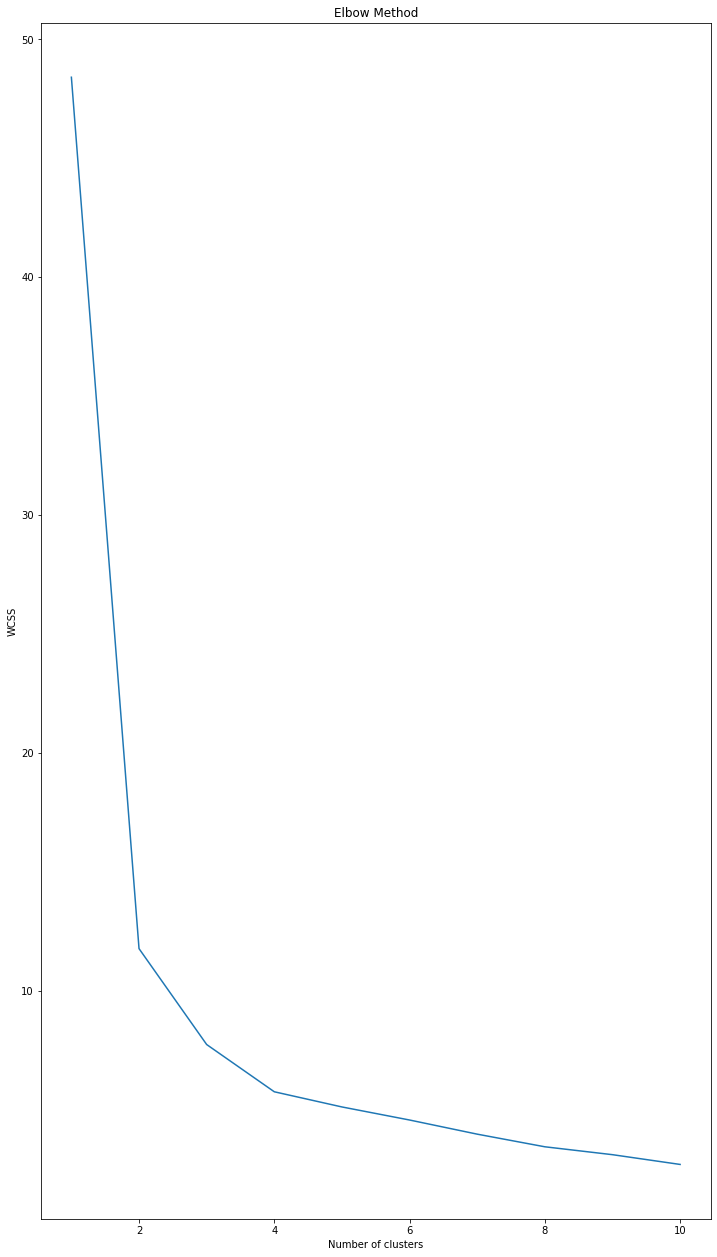

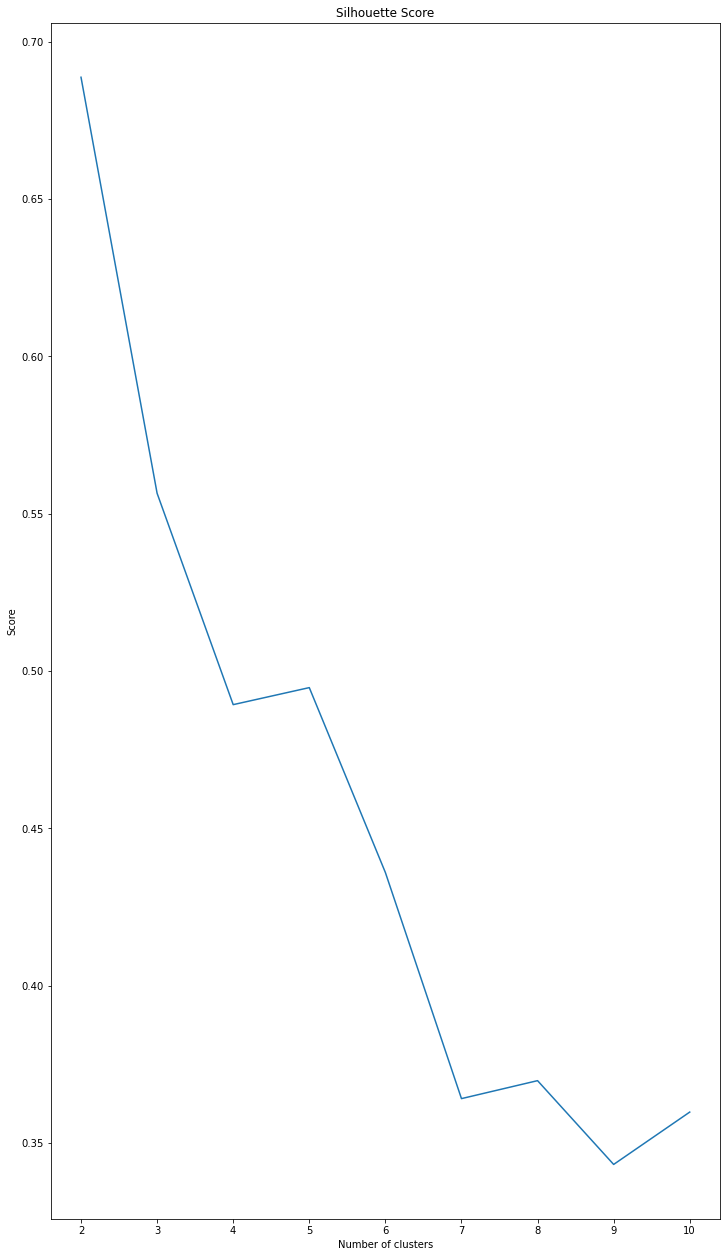

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df2[['profit_index', 'performance_index', 'cash_flow_index', 'financial_health_index']])

# Determine the optimal number of clusters
# Use the elbow method
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Use the silhouette score
from sklearn.metrics import silhouette_score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    sil_scores.append(silhouette_score(normalized_data, kmeans.labels_))
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

# Fit the k-means algorithm to the data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(normalized_data)

# Predict the cluster labels for each company
labels = kmeans.predict(normalized_data)

# Assign a category to each cluster label
categories = []
for label in labels:
    means = df2.iloc[kmeans.labels_ == label][['profit_index', 'performance_index', 'cash_flow_index', 'financial_health_index']].mean()
    if means['profit_index'] > 0.8 and means['performance_index'] > 0.8 and means['cash_flow_index'] > 0.8 and means['financial_health_index'] > 0.8:
        categories.append('high_quality')
    elif means['profit_index'] > 0.5 and means['performance_index'] > 0.5 and means['cash_flow_index'] > 0.5 and means['financial_health_index'] > 0.5:
        categories.append('upper_middle_quality')
    elif means['profit_index'] > 0.3 and means['performance_index'] > 0.3 and means['cash_flow_index'] > 0.3 and means['financial_health_index'] > 0.3:
        categories.append('lower_middle_quality')
    else:
        categories.append('low_quality')

# Add the categories to the dataframe
df2['category'] = categories

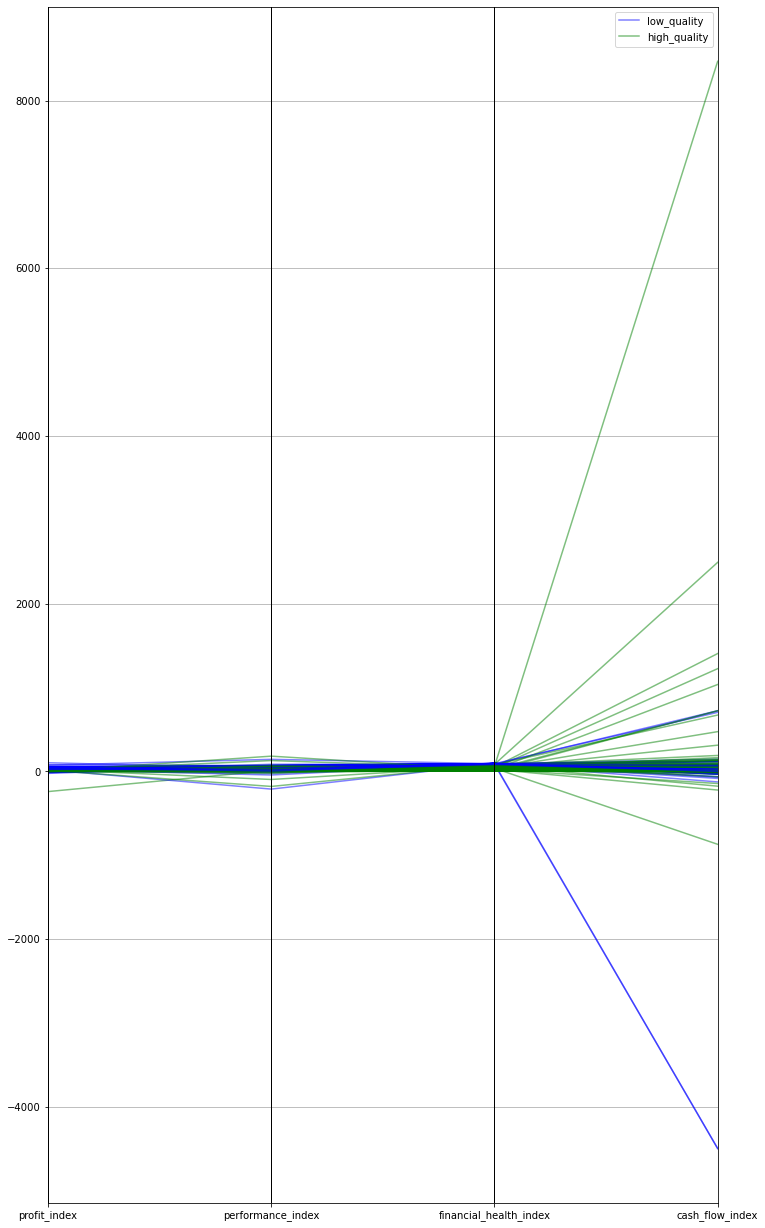

In [110]:
import pandas as pd
from pandas.plotting import parallel_coordinates



# Create a parallel coordinates plot
parallel_coordinates(df2, 'category', color=['blue', 'green', 'orange', 'red'], alpha=0.5)

# Show the plot
plt.show()

5.4 Conclusion

Clustering results: high quality companies have higher financial index than low quality companies; 
low quality companies have the lowest cash flow index 